# **Business case study : Yulu micro-mobility service**

## **Introduction :**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate trafc congestion in India, Yulu provides the safest commute solution
through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, ofce spaces, residential areas, corporate offices, etc) to make those rst and last miles smooth, affordable, and
convenient!
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specically, they
want to understand the factors affecting the demand for these shared electric cycles in the Indian market.


 ## **To find out :**

 - Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
 - How well those variables describe the electric cycle demands

 ## **Dataset**

  Dataset
  The company collected the data with respect to different aspects which affects the usage of the yulu service.

  The dataset has the following features:

  Dataset link [here](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089)

  The link to the colab notebook can be found [here](https://colab.research.google.com/drive/11RNJbN539_lSaRFgzHna6BhvZ3c0MWT3#scrollTo=RpPukHDxzid6)


## **Preliminary information about the features of the Dataset:**

- `datetime` : datetime
- `season` : season (1: spring, 2: summer, 3: fall, 4: winter)
- `holiday` : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
weather:

    1: Clear, Few clouds, partly cloudy, partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : temperature in Celsius
- `atemp` : feeling temperature in Celsius
- `humidity` : humidity
- `windspeed` : wind speed
- `casual` : count of casual users
- `registered` : count of registered users
- `count` : count of total rental bikes including both casual and registered


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import cov, corrcoef
from statsmodels.stats.weightstats import ztest
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm, ttest_1samp, ttest_ind, ttest_rel, chisquare, chi2, chi2_contingency, f_oneway, kruskal, shapiro, levene, pearsonr, spearmanr

In [ ]:
# downloading the dataset of the yulu bikes
yulu_dataset = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")


In [ ]:
# displaying the dataset
yulu_dataset

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
# checking the number of entries present in the dataset
yulu_dataset.shape

(10886, 12)

There are total 10886 data entries with 12 features.

In [ ]:
# checking the presence of duplicate datas
yulu_dataset.duplicated().value_counts()

False    10886
Name: count, dtype: int64

There is no duplicate entry present in the dataset.


# **Exploratory data analysis of the dataset :**

## **Univariate analysis :**

## **Description of the dataset :**

In [ ]:
# describing the dataset
yulu_dataset.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### **Observations :**

**Season Distribution:**
- Majority of data points fall into seasons 2 (summer) and 3 (fall).
- Least data points correspond to season 1 (spring).

**Holiday and Working Day Distribution:**
- Holidays are infrequent, with only about 3% of data points indicating a holiday.
- About 68% of the data points are working days.

**Weather Conditions:**
- Weather mostly falls into category 1, indicating clear or partly cloudy conditions.
- Data includes a variety of weather conditions, with no extreme outliers.

**Temperature:**
- Temperatures range from 0.82°C to 41°C.
- Majority of temperatures are between 13.94°C and 26.24°C.

**Humidity and Windspeed:**
- Humidity levels vary widely, ranging from 0% to 100%.
- Windspeeds range from 0 to 56.99 km/h.

**Usage:**
- On average, around 155 bikes are rented per hour.
- The maximum rentals in an hour recorded is 977, with a minimum of 1 rental.

## **Sepearating the continuous and categorical datas :**

In [ ]:
# seperating the categorical and continuous columns

categorical_columns = ["season", "holiday", "workingday", "weather"]
continuous_columns = ["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]

## **Desctiption of the continous datas :**

In [ ]:
# descritption of the continuous columns
yulu_dataset[continuous_columns].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### **Observations :**
**Temperature and "Feels Like" Temperature (atemp):**

- Average temperature is around 20.23°C, with a standard deviation of 7.79°C.
- The minimum recorded temperature is 0.82°C, while the maximum is 41°C.
- "Feels like" temperature (atemp) averages approximately 23.66°C.

**Humidity:**

- Humidity levels have an average of 61.89%, with a standard deviation of 19.25%.
- Humidity ranges from a minimum of 0% to a maximum of 100%.

**Windspeed:**

- The average windspeed is approximately 12.80 km/h, with a standard deviation of 8.16 km/h.
- Windspeed varies from a minimum of 0 km/h to a maximum of 56.99 km/h.

**Bike Rentals:**
- On average, there are about 36 casual bike rentals and 155 registered bike rentals per hour.
- The total count of bike rentals averages around 191 per hour, with a standard deviation of 181.14.
- The minimum hourly bike rental count is 1, while the maximum is 977.

## **Description of the categorical datas :**

In [ ]:
# describing the categorical datas
for columns in categorical_columns:
    print(columns.center(60, "-"))
    print(yulu_dataset[columns].value_counts())
    print()

---------------------------season---------------------------
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

--------------------------holiday---------------------------
holiday
0    10575
1      311
Name: count, dtype: int64

-------------------------workingday-------------------------
workingday
1    7412
0    3474
Name: count, dtype: int64

--------------------------weather---------------------------
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64



### **Observations :**

**Season Distribution:**
- Winter (Season 4) has the highest count with 2734 data points.
- Summer (Season 2) and Fall (Season 3) have almost the same count, each with 2733 data points.
- Spring (Season 1) has a slightly lower count compared to the other seasons, with 2686 data points.

**Holiday Distribution:**
- Non-holiday days (Holiday 0) dominate the dataset with 10575 data points.
- Holidays (Holiday 1) are much less frequent, with only 311 data points.

**Working Day Distribution:**
- Working days (Workingday 1) make up the majority of the dataset, with 7412 data points.
- Non-working days (Workingday 0), including weekends and holidays, have fewer data points, totaling 3474.

**Weather Conditions:**
- Clear or partly cloudy weather (Weather 1) is the most common, with 7192 data points.
- Misty or cloudy conditions (Weather 2) follow with 2834 data points.
- Light snow or rain (Weather 3) occur less frequently, with 859 data points.
- Extreme weather conditions (Weather 4) are rare, represented by only 1 data point.

## **Visual description of datas :**

## **Univariate analysis :**

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# defining the colours to use for the plots
colors = ['#ef4764', '#f78c6b', '#ffd166', '#06d6a0', '#118ab2', '#073b4c']

# Set the style
plt.style.use('seaborn-darkgrid')

### **Countplots of the categorical columns :**

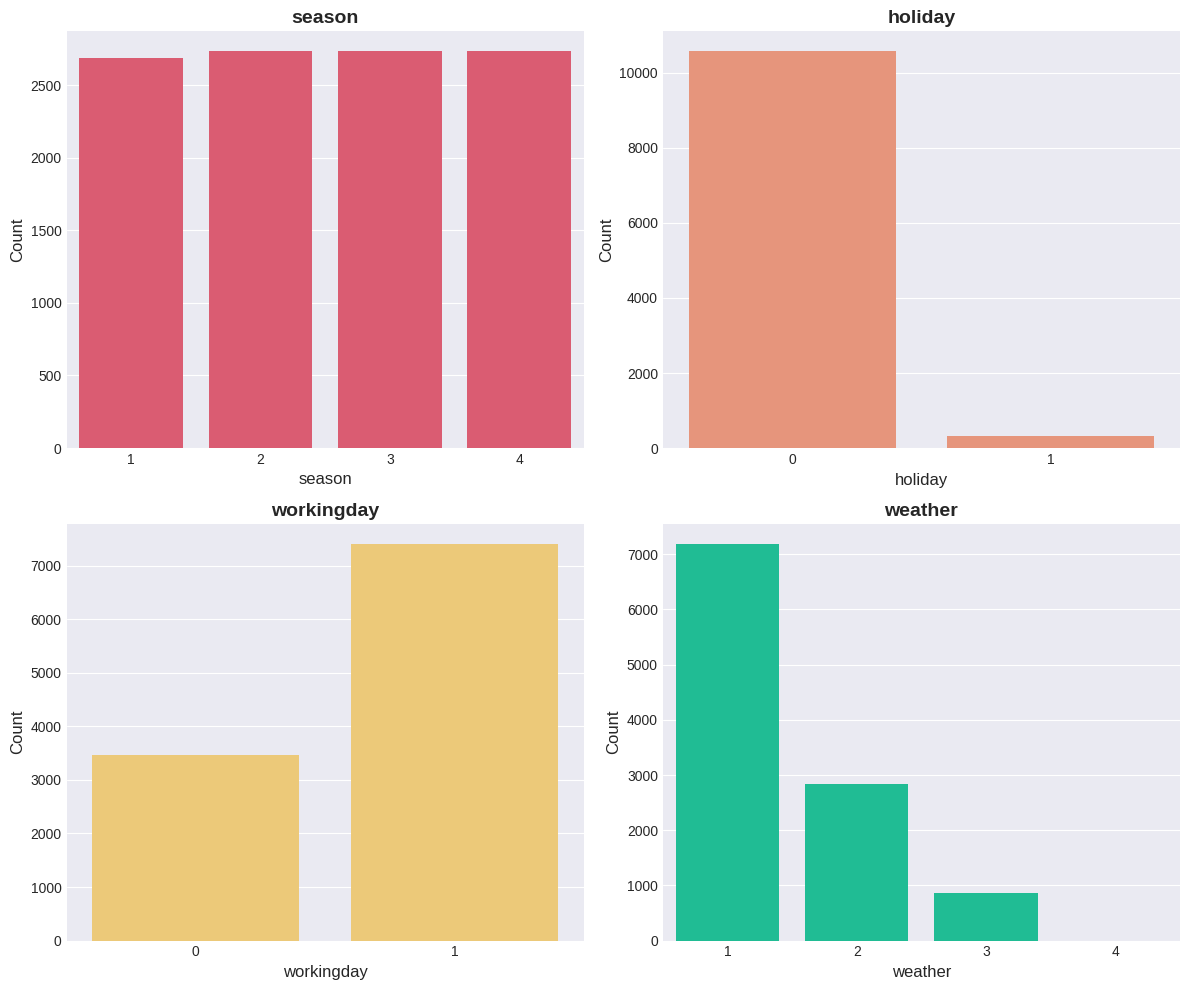

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
for i, col in enumerate(categorical_columns):
    sns.countplot(data=yulu_dataset, x=col, ax=axs[i//2][i%2], color=colors[i])
    axs.flatten()[i].set_title(col, fontsize=14, fontweight='bold')
    axs.flatten()[i].set_xlabel(col, fontsize=12)
    axs.flatten()[i].set_ylabel('Count', fontsize=12)
    # axs.flatten()[i].tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

**Observations:**

**Season Distribution:**

- Majority of data points fall into seasons 2 (summer) and 3 (fall).
- Least data points correspond to season 1 (spring).


**Holiday and Working Day Distribution:**

- Holidays are infrequent, with only about 3% of data points indicating a holiday.
- About 68% of the data points are working days.


**Weather Conditions:**

- Weather mostly falls into category 1, indicating clear or partly cloudy conditions.
- Data includes a variety of weather conditions, with no extreme outliers.




### **Histogram and boxplot for the continous columns :**

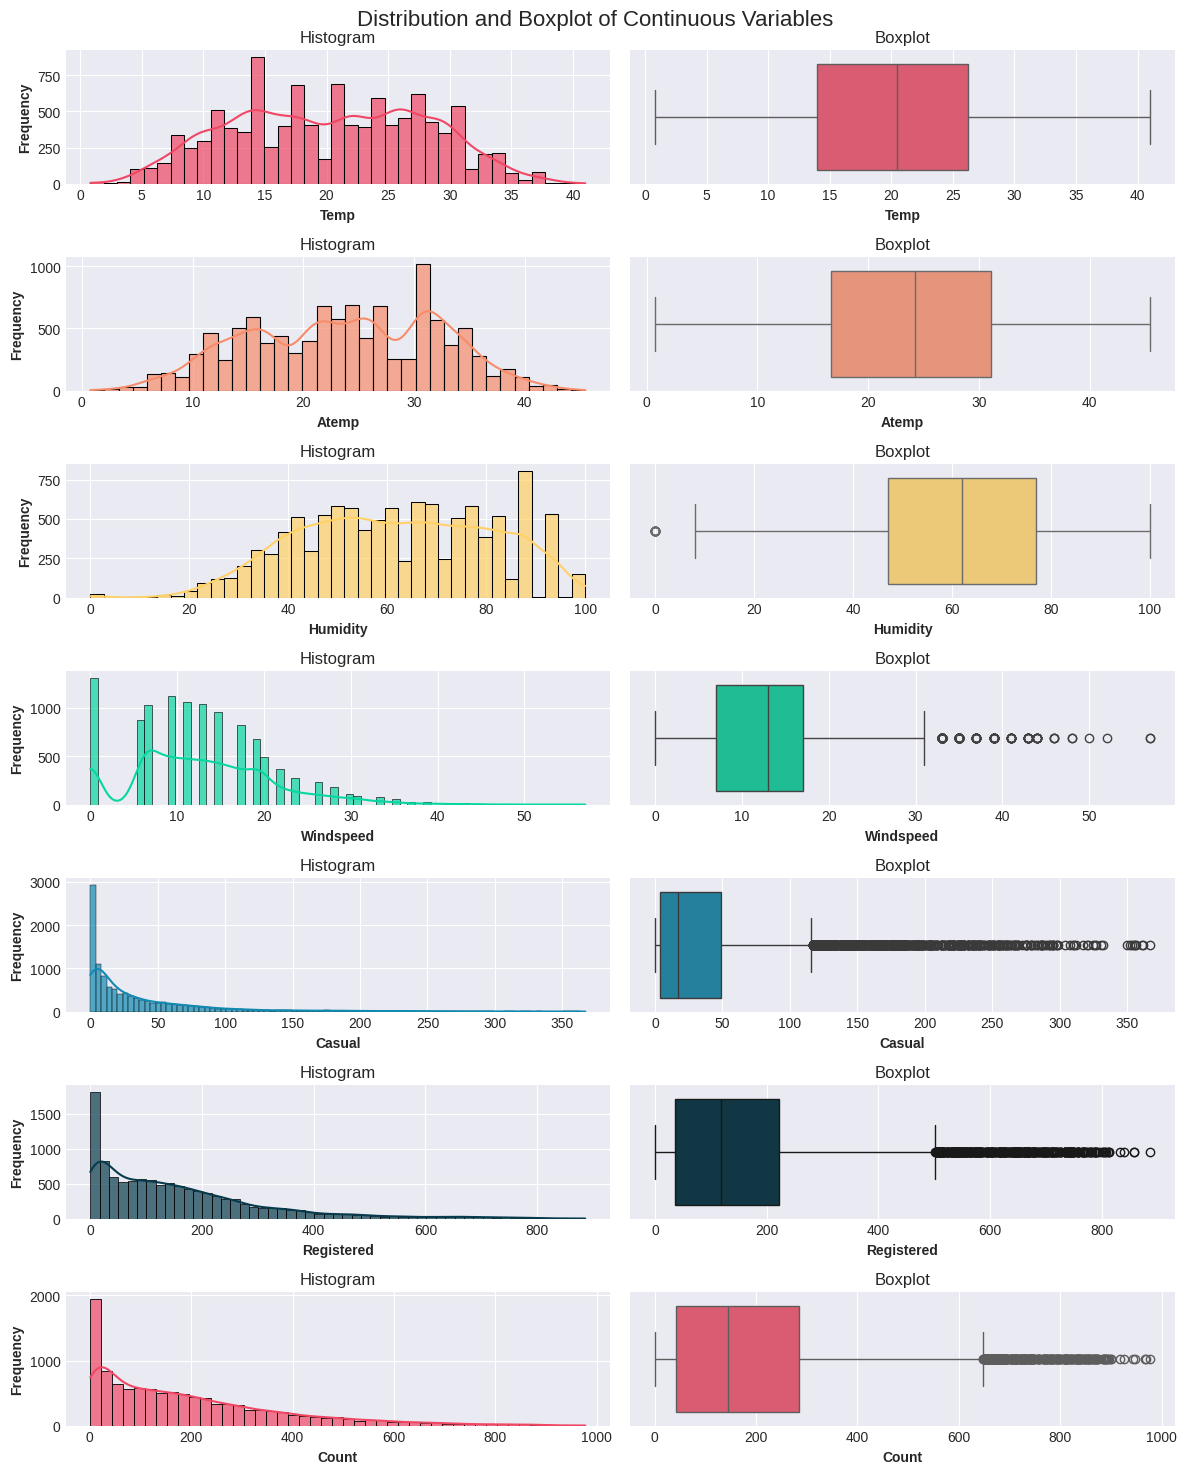

In [ ]:
# Suppress all warnings
warnings.filterwarnings("ignore")

# Create subplots
fig, axs = plt.subplots(7, 2, figsize=(12, 15))

# Set subplot titles and adjust subplot spacing
fig.suptitle('Distribution and Boxplot of Continuous Variables', fontsize=16)
plt.subplots_adjust(top=1.05, hspace=0.75)

# Plot histograms and boxplots
for i, col in enumerate(continuous_columns):
    # Histogram
    sns.histplot(data=yulu_dataset, x=col, ax=axs[i][0], kde=True, color=colors[i % len(colors)], alpha=0.7)
    axs[i][0].set_xlabel(col.capitalize(),fontweight='bold')
    axs[i][0].set_ylabel('Frequency',fontweight='bold')
    axs[i][0].set_title('Histogram')

    # Boxplot
    sns.boxplot(data=yulu_dataset, x=col, ax=axs[i][1], color=colors[i % len(colors)])
    axs[i][1].set_xlabel(col.capitalize(),fontweight='bold')
    axs[i][1].set_title('Boxplot')


# Show plot
plt.tight_layout()
plt.show()

**Observations :**

**Temperature:**

- The histogram shows a unimodal distribution, with most temperatures falling between around 10°C to 30°C.
- The boxplot does not indicate any significant outliers in the temperature data.


**"Feels Like" Temperature (`atemp`):**

- The histogram is similar to the temperature histogram, suggesting a strong correlation between the two variables.
- The boxplot does not show any extreme outliers for the "feels like" temperature.


**Humidity:**

- The histogram indicates a unimodal distribution, with humidity levels mostly concentrated around 60-80%.
- The boxplot reveals some potential outliers in the humidity data, as indicated by the dots outside the whiskers.


**Windspeed:**

- The histogram shows a right-skewed distribution, with the majority of windspeeds being relatively low.
- The boxplot suggests the presence of some outliers in the windspeed data, represented by the dots outside the whiskers.


**Casual Bike Rentals:**

- The histogram displays a highly right-skewed distribution, indicating that most of the time, there are relatively few casual bike rentals.
- The boxplot confirms the presence of several outliers in the casual bike rental data.


**Registered Bike Rentals:**

- The histogram is also right-skewed, but less so than the casual bike rentals histogram.
- The boxplot shows some potential outliers in the registered bike rental data.


**Total Bike Rentals (`Count`):**

- The histogram for the total bike rentals exhibits a right-skewed distribution, similar to the individual casual and registered bike rental distributions.
- The boxplot indicates the presence of several outliers in the total bike rental count data.

## **Bivariate analysis :**

### **Boxplot and histogram of the categorical columns**

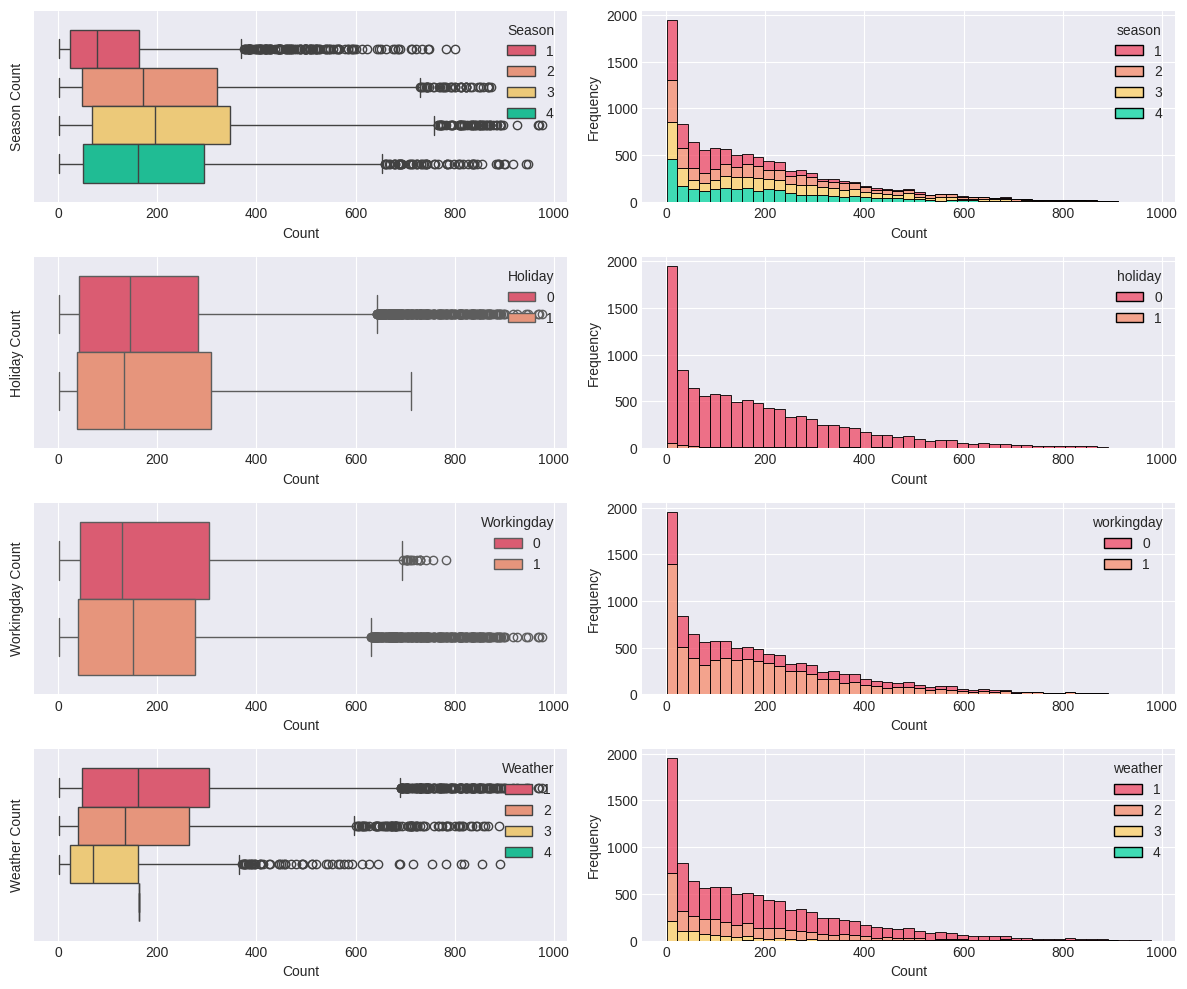

In [ ]:
# Suppress all warnings
warnings.filterwarnings("ignore")

# Create a custom color palette
custom_palette = sns.color_palette(colors, len(categorical_columns))

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 10))

# Conduct bivariate analysis with custom colors
for i, col in enumerate(categorical_columns):
    # Boxplot
    sns.boxplot(data=yulu_dataset, x="count", hue=col, palette=custom_palette, ax=axs[i][0])
    axs[i][0].set_xlabel("Count")
    axs[i][0].set_ylabel(col.capitalize() + " Count")
    axs[i][0].legend(title=col.capitalize(), loc='upper right')

    # Histogram
    sns.histplot(data=yulu_dataset, x="count", hue=col, palette=custom_palette, ax=axs[i][1], multiple="stack")
    axs[i][1].set_xlabel("Count")
    axs[i][1].set_ylabel("Frequency")


# Adjust layout and show plot
plt.tight_layout()
plt.show()


**Observations :**

**Season:**

- The boxplot shows that the median bike rental count is highest during season 3 (fall) and lowest during season 1 (spring).
- The histogram confirms this observation, with a higher frequency of higher rental counts during season 3 and a higher frequency of lower rental counts during season 1.

**Holiday:**

- The boxplot reveals that the median bike rental count is lower on holidays (1) compared to non-holidays (0).
- The histogram also shows a higher frequency of lower rental counts on holidays.

**Workingday:**

- The boxplot indicates that the median bike rental count is higher on working days (1) compared to non-working days (0).
- The histogram supports this observation, with a higher frequency of higher rental counts on working days.

**Weather:**

- The boxplot suggests that the median bike rental count is highest for weather condition 1 (clear, few clouds, partly cloudy) and lowest for weather condition 4 (heavy rain, thunderstorm).
- The histogram also exhibits a higher frequency of higher rental counts for weather condition 1 and a higher frequency of lower rental counts for weather conditions 3 (light snow, light rain) and 4.

### **Pairplot of the continuous columns :**




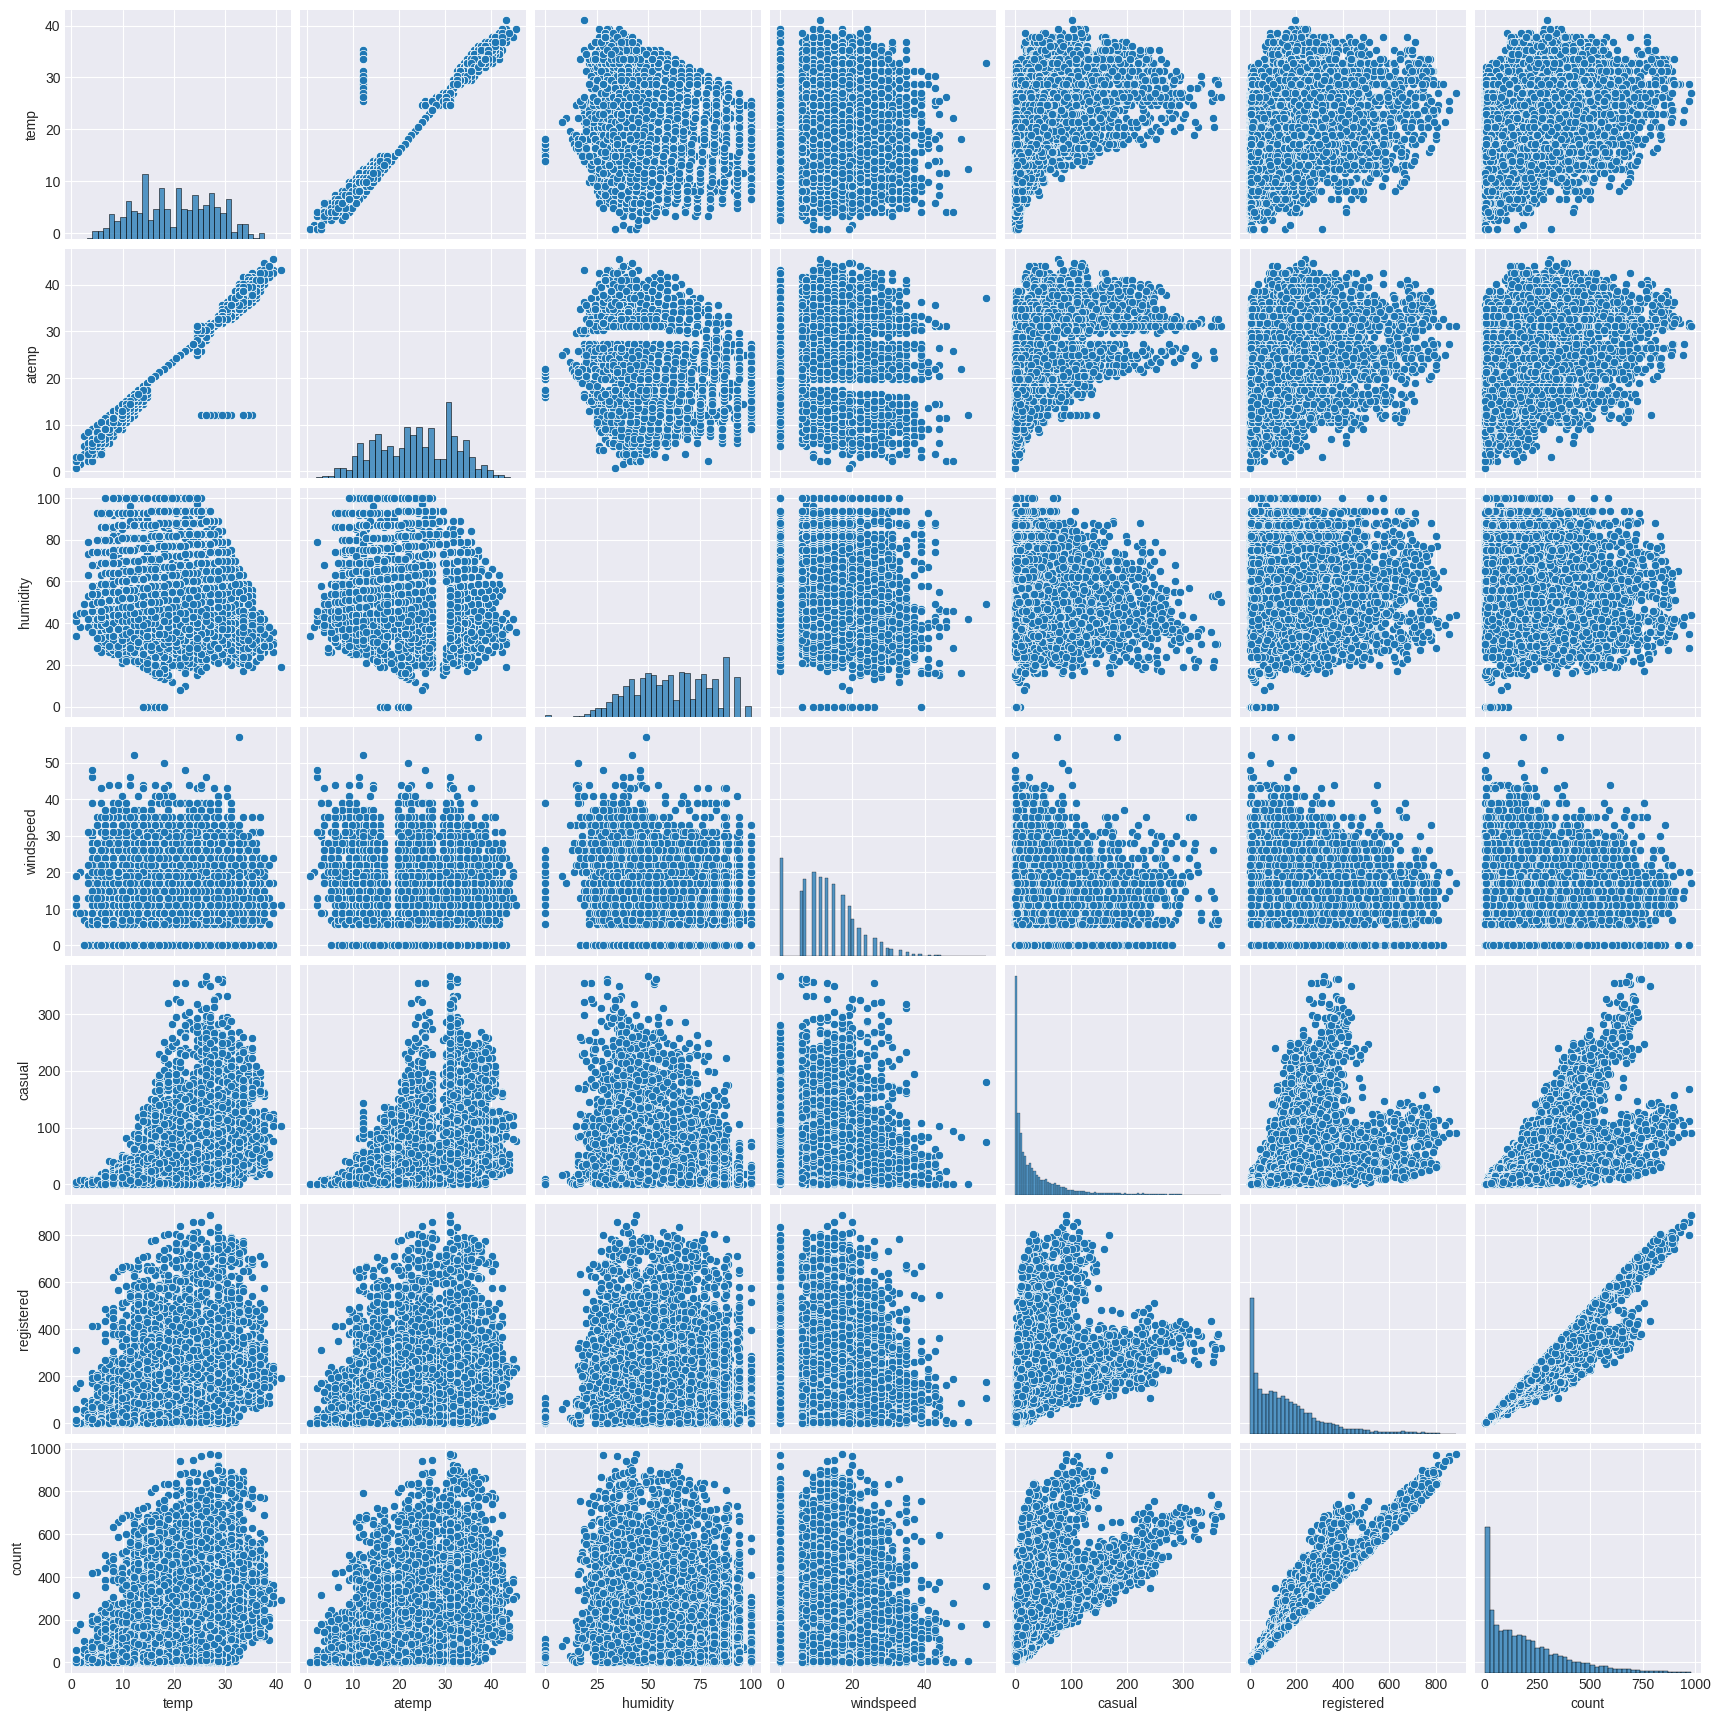

In [ ]:
# Create pairplot
sns.pairplot(data=yulu_dataset[continuous_columns])

# Show plot
plt.show()

**Observations :**

1. Most variables exhibit a right-skewed distribution, with a long tail towards higher values.
2. The scatter plots below the diagonal reveal potential correlations between variables.
3. temp and atemp (feels like temperature) have a strong positive correlation, as expected.
4. registered and count (total rentals) show a strong positive correlation.
casual and registered have a moderate positive correlation.
5. humidity and windspeed appear to have a weak or no correlation with other variables.

### **Heatmap of the continuous columns :**

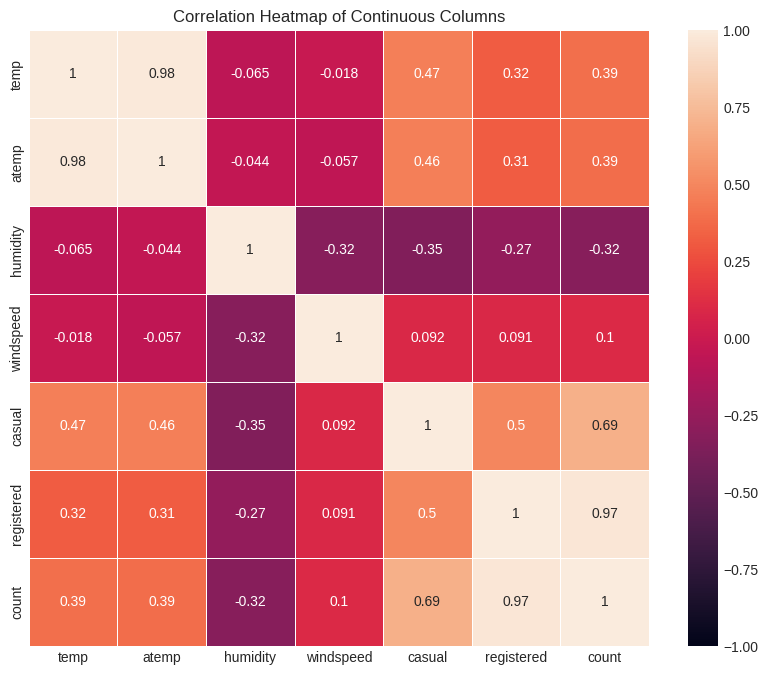

In [ ]:
# Compute the correlation matrix
corr_matrix = yulu_dataset[continuous_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,vmin =-1, vmax = 1, linewidths=.5)
plt.title('Correlation Heatmap of Continuous Columns')
plt.show()


**Observations :**

1. temp and atemp (feels like temperature) have a very strong positive correlation of 0.98, which is expected as they measure related temperature metrics.
2. registered and count (total bike rentals) have a high positive correlation of 0.97, which is understandable since registered users contribute significantly to the total rentals.
3. casual and registered have a moderate positive correlation of 0.5, suggesting that while related, the casual and registered user counts can vary independently.
4. humidity has a weak negative correlation with most other variables, with the strongest negative correlation being -0.35 with casual rentals.
5. windspeed has a very weak positive correlation with casual (0.091) and registered (0.1) rentals, but a slightly stronger negative correlation of -0.32 with humidity.
6. The variables temp, atemp, casual, registered, and count exhibit positive correlations among themselves, with varying strengths.
7. Overall, the heatmap reveals that temperature-related variables (temp and atemp) have the strongest positive correlations with bike rental counts (casual, registered, and total), while humidity and windspeed have relatively weaker correlations with the other variables.

# **Hypothesis testing :**

## **Hypothesis testing 1 : check if Working Day has an effect on the number of electric cycles rented**

### **Visual analysis :**

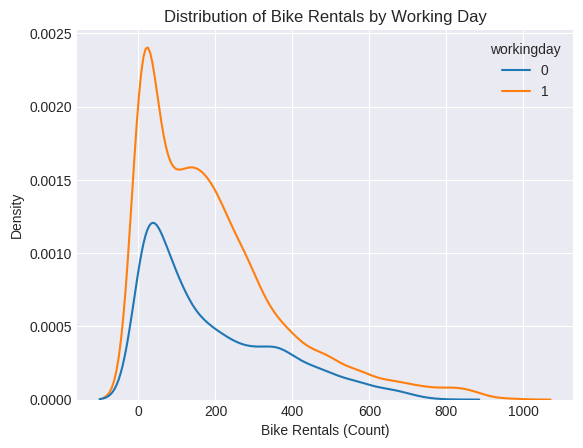

In [ ]:
# Create KDE plot
sns.kdeplot(data=yulu_dataset, x="count", hue="workingday")
plt.xlabel("Bike Rentals (Count)")
plt.title("Distribution of Bike Rentals by Working Day")
plt.show()

**Observations :**

From the kde plot is does not seems like that working days have any effect on the number of bikes rentals.

### **Formulation of the hypothesis :**

**Null Hypothesis** (`Hₒ`) : Working day does not have any effect on number of cycle rented.

**Alternate Hypothesis** (`Hₐ`) : Working day has an effect on number of cycle rented.

**Significance level** (`α`) : 0.05 ( 5% is good enough significance level for this test ).

### **Assumptions :**

1.**Random Sampling:** We will take 100 random sample data from the population data.

2.**Independence:** We assume that the data is independent of each other.

3.**Normality:** We are testing on mean of the data and we took 100 random sample from the population data. So, by Central limit theorem we can say that the data is normally distributed.

4.**Equal Variances:** We can test if there is equality among the variances of the datas by levene test with a significance level of 0.05.

### **Levene test :**

**Null Hypothesis** (`Hₒ`) : Working day does not have any effect on number of cycle rented.

**Alternate Hypothesis** (`Hₐ`) : Working day has an effect on number of cycle rented.

**Significance level** (`α`) : 0.05

In [ ]:
# Perform Levene test
levene_stat, pval = levene(yulu_dataset[yulu_dataset['workingday'] == 0]['count'].values, yulu_dataset[yulu_dataset['workingday'] == 1]['count'].values)
print("Levene stat:", levene_stat)
print("P-value:", pval)

# Define significance level
alpha = 0.05

# Interpret the result
if pval >= alpha:
    print("Fail to reject null hypothesis. The variance of two groups are approximately equal.")
else:
    print("Reject null hypothesis. The variance of two groups are unequal.")

Levene stat: 0.004972848886504472
P-value: 0.9437823280916695
Fail to reject null hypothesis. The variance of two groups are approximately equal.


**Conclusion :** so, we conclude that our assumption of equal variances is correct.

### **Selection of appropriate test :**

As we have numerical vs categorical data we can do 2 sample Z test as the selected sample size is 100.

We will also cross check our result using 2 sample T test.

By observing the alternate hypothesis we can decide that we have to perform two-tailed test.

In [ ]:
# random sampling
working_sample = np.random.choice(yulu_dataset[yulu_dataset['workingday'] == 0]['count'].values, 100)
non_working_sample = np.random.choice(yulu_dataset[yulu_dataset['workingday'] == 1]['count'].values, 100)
print("Sample from the non-working day population:\n\n", working_sample,"\n")
print("Sample from the working day population:\n\n", non_working_sample)

Sample from the non-working day population:

 [  6 169  44 284  33  27 593 593 676  27  20 376 490  37  64 196  36   8
  62 536 244 107 414  49  76 701  78   5 124   6 617  50  52 290  73  19
  19 387 134 162 376 220 137  14 542 560 357 120  63  14 534   4 124 118
  62 406 329  45  86 152  23  62 188 298 169  33 370   2 102 207 109 121
  26 109 260 388 130 118 182 423 380  23  10  63  74 162 191 350 108 536
  96  18  70 485  95  50 110 350  59  31] 

Sample from the working day population:

 [ 70  15 328 106 124 259  35  10 334 155 248 397   6 272 111  13 199 210
   2 389 168 172  19  50 224 126 233 179  71  34  69 272   9 172  51 394
 307 165   7 274 117  68  35 203  44  37 103   7  78 263 158 298 334 161
 204  26 454  72   4  15 353 103 627  21  26   4 265 314   2  36 181  16
 550  50  60 270 308  64 121 674  21 428  34 412 435 152   5 511 148 206
 443 212 228 211 111 348 157 207 837 324]


### **2 sample Z test :**

In [ ]:
# z-test
z_stat, pval = ztest(x1=working_sample, x2=non_working_sample, alternative="two-sided")
print("Z-statistic:", z_stat)
print("P-value:", pval)

# Define significance level
alpha = 0.05

# Interpret the result
if pval >= alpha:
    print("Fail to reject null hypothesis.\nWorking Day does not have an effect on the number of electric cycles rented.")
else:
    print("Reject null hypothesis.\nWorking Day has an effect on the number of electric cycles rented.")

Z-statistic: 0.11772115374205201
P-value: 0.9062886050635589
Fail to reject null hypothesis.
Working Day does not have an effect on the number of electric cycles rented.


**Conclusion :** by performing we can conclude that the working day does not have any effect on number of electric cycles rented.

### **2 sample independent T test :**

In [ ]:
# Perform independent samples t-test
t_stat, pval = ttest_ind(working_sample, non_working_sample, alternative="two-sided")
print("T-statistic:", t_stat)
print("P-value:", pval)

# Define significance level
alpha = 0.05

# Interpret the result
if pval >= alpha:
    print("Fail to reject null hypothesis.\nWorking Day does not have an effect on the number of electric cycles rented.")
else:
    print("Reject null hypothesis.\nWorking Day has an effect on the number of electric cycles rented.")

T-statistic: 0.11772115374205201
P-value: 0.9064079375690464
Fail to reject null hypothesis.
Working Day does not have an effect on the number of electric cycles rented.


**Conclusion :** So, performing the independent T test also we get the same result and hence we can conclude that working day does not have any effect on the number of electric cycles rented.

## **Hypothesis testing 2 : check if No. of cycles rented is similar or different in different weather**

### **Visual analysis :**

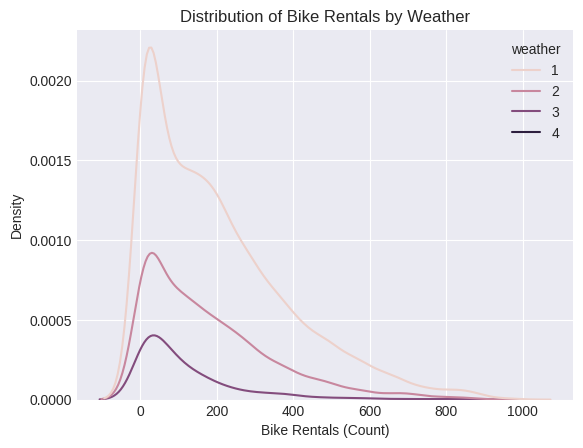

In [ ]:
# Create KDE plot
sns.kdeplot(data=yulu_dataset, x="count", hue="weather")
plt.xlabel("Bike Rentals (Count)")
plt.title("Distribution of Bike Rentals by Weather")
plt.show()

**Observations :**

From the above kde plot it is very obvious that different weathers have different number of cycle rented.


### **Formulation of the hypothesis :**

**Null Hypothesis** (`Hₒ`) : Number of cycle rented is similar in different weather.

**Alternate Hypothesis** (`Hₐ`) : Number of cycle rented is different in different weather.

**Significance level** (`α`) : 0.05 ( 5% is good enough significance level for this test).

### **Seperating the datas of the four weathers :**

In [ ]:
weather1_sample = yulu_dataset[yulu_dataset['weather'] == 1]['count'].values
weather2_sample = yulu_dataset[yulu_dataset['weather'] == 2]['count'].values
weather3_sample = yulu_dataset[yulu_dataset['weather'] == 3]['count'].values
weather4_sample = yulu_dataset[yulu_dataset['weather'] == 4]['count'].values
print("Data of weather type 1:\n\n", weather1_sample,"\n")
print("Data of weather type 2:\n\n", weather2_sample,"\n")
print("Data of weather type 3:\n\n", weather3_sample,"\n")
print("Data of weather type 4:\n\n", weather4_sample)

Data of weather type 1:

 [ 16  40  32 ... 168 129  88] 

Data of weather type 2:

 [  1  94 106 ...  18  15   7] 

Data of weather type 3:

 [ 35  37   2   8  59  74  76   5   7   1  15  20  95  51  32  20  29  19
  60  33  27  13   4   7   3   2   3  22  52 135  16   2   3   4   1   1
   3  18  49 155   8   9   4   4  10  20  34  47  52  72  55  60  71   1
  88  84  46  37  16   7   3   5  39   7  11  25  23  11  11   7   4   2
  21  18   3   2   1   3  12  37  44  24  17  11  34  12  12  14  21  82
  56  38  28  27   8   5  55   8   3   6   4   7  12  28  95 184 190 136
  79  15   2   5 157  46  28  19  13   1 113 221  80  42  15  25 148  62
  53  14   3  54 226  54  40 106 291 224   2   2   3   5  34  70 164  95
  10  45  29  22  31  58  63  78  33  15  53  24 162  27   7   4   1   3
   9  21  52  79  40 470 292 378 351   5  82 157 491 398 119  32  88 279
 248 248 157  59  26  44  14 392 226 453  13   8   4   4  22  49 104 153
   6   9   3 202 106 331 213 164 183 180  79 309 171  6

### **Assumptions :**

**Independence:** We assume that the data is independent of each other.

**Normality:** We can test the normality of the data using QQ-Plots or
Shapiro-Wilk Test. (significance level = 0.05)

**Equal Variances:** We can test that by performing Levene Test. (significance level = 0.05)

### **Test for normality (QQ Plot) :**

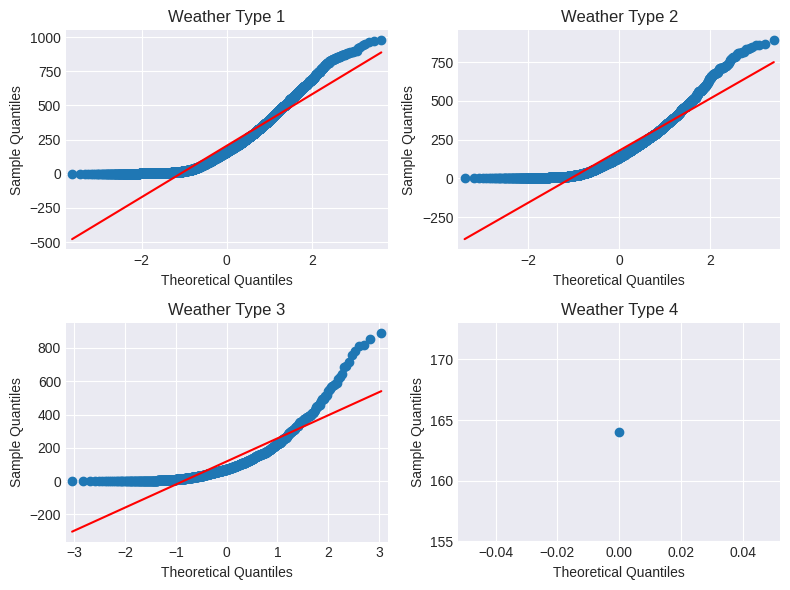

In [ ]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot Q-Q plots for each weather type
qqplot(weather1_sample, ax=axs[0][0], line='s')
axs[0][0].set_title('Weather Type 1')
qqplot(weather2_sample, ax=axs[0][1], line='s')
axs[0][1].set_title('Weather Type 2')
qqplot(weather3_sample, ax=axs[1][0], line='s')
axs[1][0].set_title('Weather Type 3')
qqplot(weather4_sample, ax=axs[1][1], line='s')
axs[1][1].set_title('Weather Type 4')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

**Conclusion :** From the qqplots of different weather types we can conclude visually that the data is not normally distributed.

Let us verify this by Shapiro-Wilk test.

### **Test for normality (Shapiro-Wilk test) :**

In [ ]:
# Define the samples for each weather type
weather_samples = [weather1_sample, weather2_sample, weather3_sample]
weather_names = ['clear weather', 'cloudy weather', 'rainy weather']

# Perform Shapiro-Wilk test for each weather type
for i, sample in enumerate(weather_samples):
    stats, p_value = shapiro(sample)
    print(f"Shapiro-Wilk Test for {weather_names[i]}:")
    print("Test Statistic:", stats)
    print("p-value:", p_value)
    print("Data is normally distributed" if p_value > 0.05 else "Data is not normally distributed")
    print()


# we cannot perform Shapiro-Wilk test on weather 4 as it only consist one data point

Shapiro-Wilk Test for clear weather:
Test Statistic: 0.8909230828285217
p-value: 0.0
Data is not normally distributed

Shapiro-Wilk Test for cloudy weather:
Test Statistic: 0.8767687082290649
p-value: 9.781063280987223e-43
Data is not normally distributed

Shapiro-Wilk Test for rainy weather:
Test Statistic: 0.7674332857131958
p-value: 3.876090133422781e-33
Data is not normally distributed



**Conclusion :** we can conclude that the data of different weathers are not normally distributed.

### **Levene test for equal variance :**

In [ ]:
# Perform Levene's test
stats, p_value = levene(weather1_sample,weather2_sample,weather3_sample,weather4_sample)

# Print the results
print("Levene's Test:")
print("\nTest Statistic:", stats)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("\nReject the null hypothesis: Variances are not equal")
else:
    print("\nFail to reject the null hypothesis: Equal variances assumed")

Levene's Test:

Test Statistic: 54.85106195954556
p-value: 3.504937946833238e-35

Reject the null hypothesis: Variances are not equal


**Conclusion :** The variances are also not equal.

### **Selection of appropriate test :**

- We will perform ANNOVA here.
- But we will cross-check our hypothesis using Kruskal-Walis test, as it is better than ANOVA when the assumptions are not met.

### **ANOVA test :**

In [ ]:
# Perform ANOVA test
f_stat, p_value = f_oneway(*weather_samples)

# Print the results
print("F-Statistic:", f_stat)
print("P-value:", p_value)

# Define significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("\nReject the null hypothesis.")
    print("Number of cycles rented is different in different weathers.")
else:
    print("\nFail to reject null hypothesis.")
    print("Number of cycles rented is similar in different weathers.")

F-Statistic: 98.28356881946706
P-value: 4.976448509904196e-43

Reject the null hypothesis.
Number of cycles rented is different in different weathers.


**Conclusion :** We can reject the null hypothesis and so we can conclude that number of cycles rented is different in differnet weathers.

We will still do Kruskal test to verify the same.

### **Kruskal-Wallis test :**

In [ ]:
# Perform ANOVA test
f_stat, p_value = kruskal(*weather_samples)

# Print the results
print("F-Statistic:", f_stat)
print("P-value:", p_value)

# Define significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("\nReject the null hypothesis.")
    print("Number of cycles rented is different in different weathers.")
else:
    print("\nFail to reject null hypothesis.")
    print("Number of cycles rented is similar in different weathers.")

F-Statistic: 204.95566833068537
P-value: 3.122066178659941e-45

Reject the null hypothesis.
Number of cycles rented is different in different weathers.


**Conclusion :** We can reject the null hypothesis and so we can conclude that number of cycles rented is different in differnet weathers.

## **Hypothesis testing 3 : check if No. of cycles rented is similar or different in different season**

### **Visual analysis :**

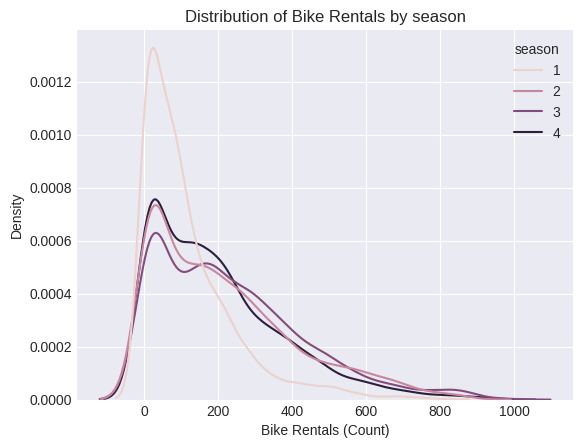

In [ ]:
# Create KDE plot
sns.kdeplot(data=yulu_dataset, x="count", hue="season")
plt.xlabel("Bike Rentals (Count)")
plt.title("Distribution of Bike Rentals by season")
plt.show()

**Observations :**

From the above kde plot it is very obvious that different seasons have different number of cycle rented.


### **Formulation of the hypothesis :**

**Null Hypothesis** (`Hₒ`) : Number of cycle rented is similar in different season.

**Alternate Hypothesis** (`Hₐ`) : Number of cycle rented is different in different season.

**Significance level** (`α`) : 0.05 ( 5% is good enough significance level for this test).

### **Seperating the datas of the four weathers :**

In [ ]:
season1_sample = yulu_dataset[yulu_dataset['season'] == 1]['count'].values
season2_sample = yulu_dataset[yulu_dataset['season'] == 2]['count'].values
season3_sample = yulu_dataset[yulu_dataset['season'] == 3]['count'].values
season4_sample = yulu_dataset[yulu_dataset['season'] == 4]['count'].values
print("Data of season type 1:\n\n", season1_sample,"\n")
print("Data of season type 2:\n\n", season2_sample,"\n")
print("Data of season type 3:\n\n", season3_sample,"\n")
print("Data of season type 4:\n\n", season4_sample)

Data of season type 1:

 [ 16  40  32 ... 223 148  54] 

Data of season type 2:

 [  6   4   7 ... 276 291 125] 

Data of season type 3:

 [ 68  31  13 ... 349 229 123] 

Data of season type 4:

 [130  58  67 ... 168 129  88]


### **Assumptions :**

**Independence:** We assume that the data is independent of each other.

**Normality:** We can test the normality of the data using QQ-Plots or
Shapiro-Wilk Test. (significance level = 0.05)

**Equal Variances:** We can test that by performing Levene Test. (significance level = 0.05)

### **Test for normality (QQ Plot) :**

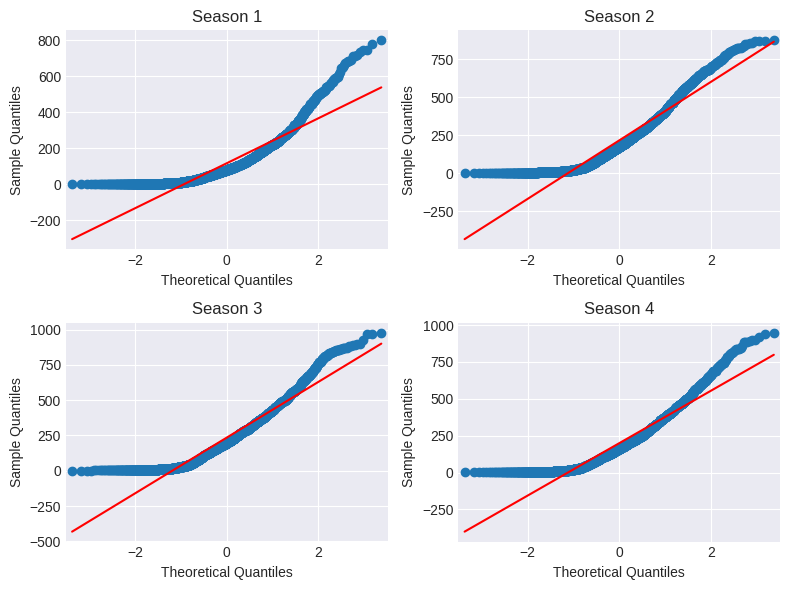

In [ ]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot Q-Q plots for each season
qqplot(season1_sample, ax=axs[0][0], line='s')
axs[0][0].set_title('Season 1')
qqplot(season2_sample, ax=axs[0][1], line='s')
axs[0][1].set_title('Season 2')
qqplot(season3_sample, ax=axs[1][0], line='s')
axs[1][0].set_title('Season 3')
qqplot(season4_sample, ax=axs[1][1], line='s')
axs[1][1].set_title('Season 4')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

**Conclusion :** From the qqplots of different season types we can conclude visually that the data is not normally distributed.

Let us verify this by Shapiro-Wilk test.

### **Test for normality (Shapiro-Wilk test) :**

In [ ]:
# Define the samples for each season
season_samples = [season1_sample, season2_sample, season3_sample, season4_sample]
season_names = ['Spring', 'Summer', 'Fall', 'Winter']

# Perform Shapiro-Wilk test for each season
for i, sample in enumerate(season_samples):
    stats, p_value = shapiro(sample)
    print(f"Shapiro-Wilk Test for {season_names[i]}:")
    print("Test Statistic:", stats)
    print("p-value:", p_value)
    print("Data is normally distributed" if p_value > 0.05 else "Data is not normally distributed")
    print()

Shapiro-Wilk Test for Spring:
Test Statistic: 0.8087388873100281
p-value: 0.0
Data is not normally distributed

Shapiro-Wilk Test for Summer:
Test Statistic: 0.900481641292572
p-value: 6.039093315091269e-39
Data is not normally distributed

Shapiro-Wilk Test for Fall:
Test Statistic: 0.9148160815238953
p-value: 1.043458045587339e-36
Data is not normally distributed

Shapiro-Wilk Test for Winter:
Test Statistic: 0.8954644799232483
p-value: 1.1301682309549298e-39
Data is not normally distributed



**Conclusion :** we can conclude that the data of different seasons are not normally distributed.

### **Levene test for equal variance :**

In [ ]:
# Perform Levene's test
stats, p_value = levene(season1_sample,season2_sample,season3_sample,season4_sample)

# Print the results
print("Levene's Test:")
print("\nTest Statistic:", stats)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("\nReject the null hypothesis: Variances are not equal")
else:
    print("\nFail to reject the null hypothesis: Equal variances assumed")

Levene's Test:

Test Statistic: 187.7706624026276
p-value: 1.0147116860043298e-118

Reject the null hypothesis: Variances are not equal


**Conclusion :** The variances are also not equal.

### **Selection of appropriate test :**

- We will perform ANNOVA here.
- But we will cross-check our hypothesis using Kruskal-Walis test, as it is better than ANOVA when the assumptions are not met.

### **ANOVA test :**

In [ ]:
# Perform ANOVA test
f_stat, p_value = f_oneway(*season_samples)

# Print the results
print("F-Statistic:", f_stat)
print("P-value:", p_value)

# Define significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("\nReject the null hypothesis.")
    print("Number of cycles rented is different in different seasons.")
else:
    print("\nFail to reject null hypothesis.")
    print("Number of cycles rented is similar in different seasons.")

F-Statistic: 236.94671081032106
P-value: 6.164843386499654e-149

Reject the null hypothesis.
Number of cycles rented is different in different seasons.


**Conclusion :** We can reject the null hypothesis and so we can conclude that number of cycles rented is different in differnet seasons.

We will still do Kruskal test to verify the same.

### **Kruskal-Wallis test :**

In [ ]:
# Perform ANOVA test
f_stat, p_value = kruskal(*season_samples)

# Print the results
print("F-Statistic:", f_stat)
print("P-value:", p_value)

# Define significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("\nReject the null hypothesis.")
    print("Number of cycles rented is different in different seasons.")
else:
    print("\nFail to reject null hypothesis.")
    print("Number of cycles rented is similar in different seasons.")

F-Statistic: 699.6668548181988
P-value: 2.479008372608633e-151

Reject the null hypothesis.
Number of cycles rented is different in different seasons.


**Conclusion :** We can reject the null hypothesis and so we can conclude that number of cycles rented is different in differnet seasons.

## **Hypothesis testing 4 : check if Weather is dependent on the season**

### **Visual analysis :**

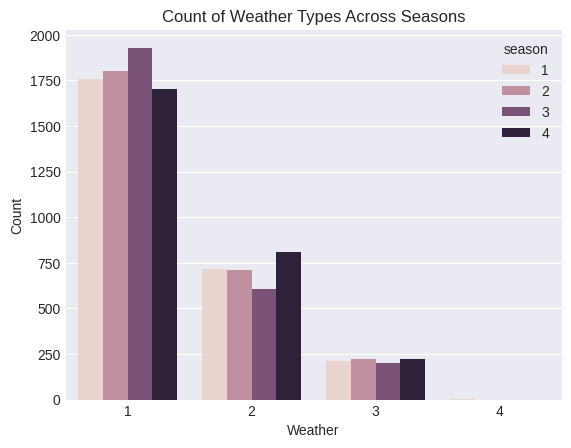

In [ ]:
# Create a countplot
sns.countplot(data=yulu_dataset, x="weather", hue="season")

# Add labels and title
plt.xlabel("Weather")
plt.ylabel("Count")
plt.title("Count of Weather Types Across Seasons")

# Show the plot
plt.show()

**Observations :**

From the above count plot it seems that weathers are dependent on season.


### **Formulation of the hypothesis :**

**Null Hypothesis** (`Hₒ`) : Weather is independent of season.

**Alternate Hypothesis** (`Hₐ`) : Weather is dependent on season.

**Significance level** (`α`) : 0.05 ( 5% is good enough significance level for this test).

### **Visualization of the data using crosstab**

In [ ]:
data_table = pd.crosstab(yulu_dataset['season'], yulu_dataset['weather'])
data_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


### **Assumptions :**

**Random Sampling :** Since we have the entire population dataset, random sampling is not a requirement for our analysis.

**Independence if data:** The dataset exhibits independence between observations, ensuring that one observation's occurrence does not influence another.

**Sufficient Sample-size :** With the exception of weather type 4, the sample sizes for the other weather types are adequately large for our analysis.

### **Chi-Square test :**

In [ ]:
# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(data_table)

# Print results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

# Define significance level
alpha = 0.05

# Compare p-value with alpha
if p_value < alpha:
    print("\nReject the null hypothesis.")
    print("Weather is dependent on the season.")
else:
    print("\nFail to reject the null hypothesis.")
    print("Weather is independent of the season.")

Chi-Square Statistic: 49.158655596893624
P-value: 1.549925073686492e-07

Reject the null hypothesis.
Weather is dependent on the season.


**Conclusion :** So we can conclude that weather is dependent on season.